# Training Data Visualiztion for single grasp (special csv files) 

In [1]:
# Importing packages 
from os import path
import csv
import sys
sys.path.append("../..")

In [2]:
# Main folder where the training data is stored
basepath = path.abspath('')
folder_name_cyli_big = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Cylinder/seq_len_1"))
folder_name_medium_big = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube/seq_len_1"))
folder_name_small_big = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Small_Cube/seq_len_1"))

In [3]:
def fetch_data(train_acc_file, train_loss_file, val_acc_file, val_loss_file, folder_name):
    # Fetching the data 
    epochs = [] 
    training_losses = [] 
    validation_losses = []
    training_accs = [] 
    validation_accs = [] 

    # Fetch epochs and training accs 
    with open(folder_name + train_acc_file, 'r') as file:
        reader = csv.reader(file)
        skip_first = True 
        for row in reader:
            if skip_first: 
                skip_first = False 
            else: 
                epochs.append(int(row[1]))
                training_accs.append(float(row[2]))

    # Fetch training losses 
    with open(folder_name + train_loss_file, 'r') as file:
        reader = csv.reader(file)
        skip_first = True 
        for row in reader:
            if skip_first: 
                skip_first = False 
            else: 
                training_losses.append(float(row[2]))

    # Fetch validation accs 
    with open(folder_name + val_acc_file, 'r') as file:
        reader = csv.reader(file)
        skip_first = True 
        for row in reader:
            if skip_first: 
                skip_first = False 
            else: 
                validation_accs.append(float(row[2]))

    # Fetch validation losses 
    with open(folder_name + val_loss_file, 'r') as file:
        reader = csv.reader(file)
        skip_first = True 
        for row in reader:
            if skip_first: 
                skip_first = False 
            else: 
                validation_losses.append(float(row[2]))
    
    return epochs, training_losses, validation_losses, training_accs, validation_accs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [5]:
import seaborn as sns
sns.set()

In [6]:
epochs_cyli_big, training_losses_cyli_big, validation_losses_cyli_big, training_accs_cyli_big, validation_accs_cyli_big = fetch_data(train_acc_file = "/train_acc_cyli_big.csv", 
                                                                                                                                     train_loss_file = "/train_loss_cyli_big.csv", 
                                                                                                                                     val_acc_file = "/val_acc_cyli_big.csv", 
                                                                                                                                     val_loss_file = "/val_loss_cyli_big.csv", 
                                                                                                                                     folder_name = folder_name_cyli_big)


epochs_medium_big, training_losses_medium_big, validation_losses_medium_big, training_accs_medium_big, validation_accs_medium_big = fetch_data(train_acc_file = "/train_acc_medium_big.csv",
                                                                                                                                     train_loss_file = "/train_loss_medium_big.csv", 
                                                                                                                                     val_acc_file = "/val_acc_medium_big.csv", 
                                                                                                                                     val_loss_file = "/val_loss_medium_big.csv", 
                                                                                                                                     folder_name = folder_name_medium_big)


epochs_small_big, training_losses_small_big, validation_losses_small_big, training_accs_small_big, validation_accs_small_big = fetch_data(train_acc_file = "/train_acc_small_big.csv",
                                                                                                                                     train_loss_file = "/train_loss_small_big.csv", 
                                                                                                                                     val_acc_file = "/val_acc_small_big.csv", 
                                                                                                                                     val_loss_file = "/val_loss_small_big.csv", 
                                                                                                                                     folder_name = folder_name_small_big)

## Plots 

### Cylinder vs Big Cube

In [7]:
best_font_size = 20

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


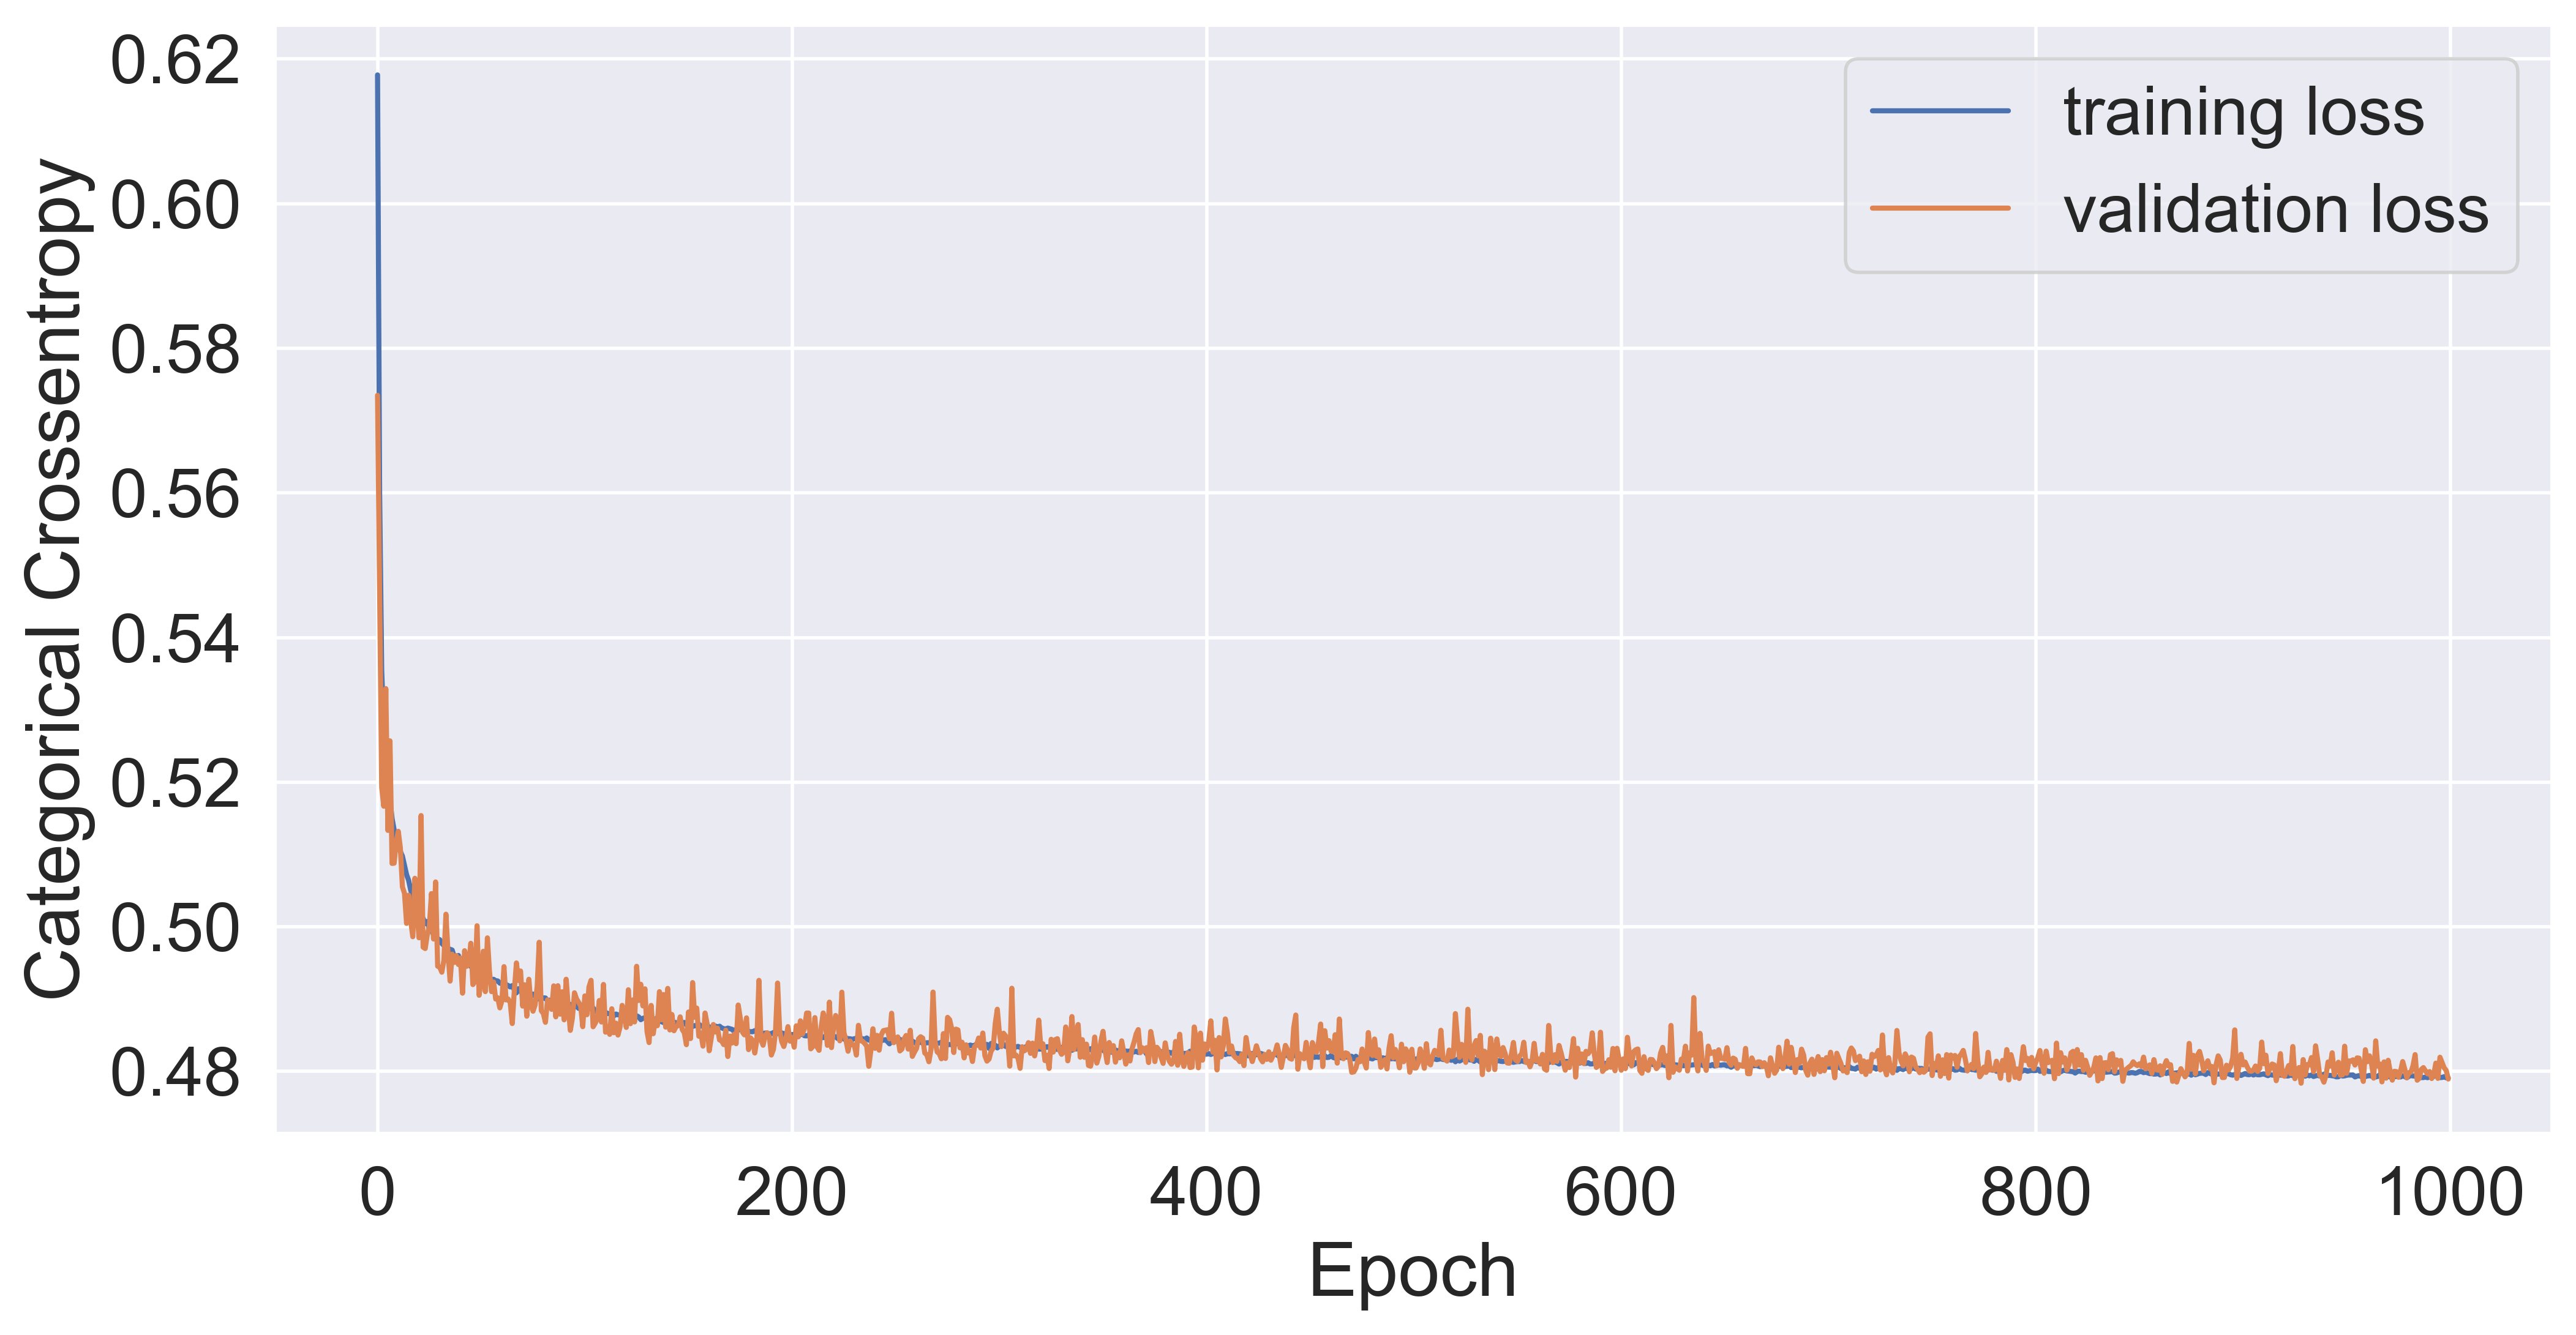

In [8]:
# Making the plots 

# Plotting the losses 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_cyli_big, training_losses_cyli_big, label = "training loss")
plt.plot(epochs_cyli_big, validation_losses_cyli_big, label = "validation loss")
plt.xlabel("Epoch", Fontsize = best_font_size+2)
plt.ylabel("Categorical Crossentropy", Fontsize = best_font_size+2)
plt.legend(loc='upper right', prop={"size":best_font_size})
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(folder_name_cyli_big + "/training_validation_losses_plot_" + str(len(epochs_cyli_big)) + "_epochs.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


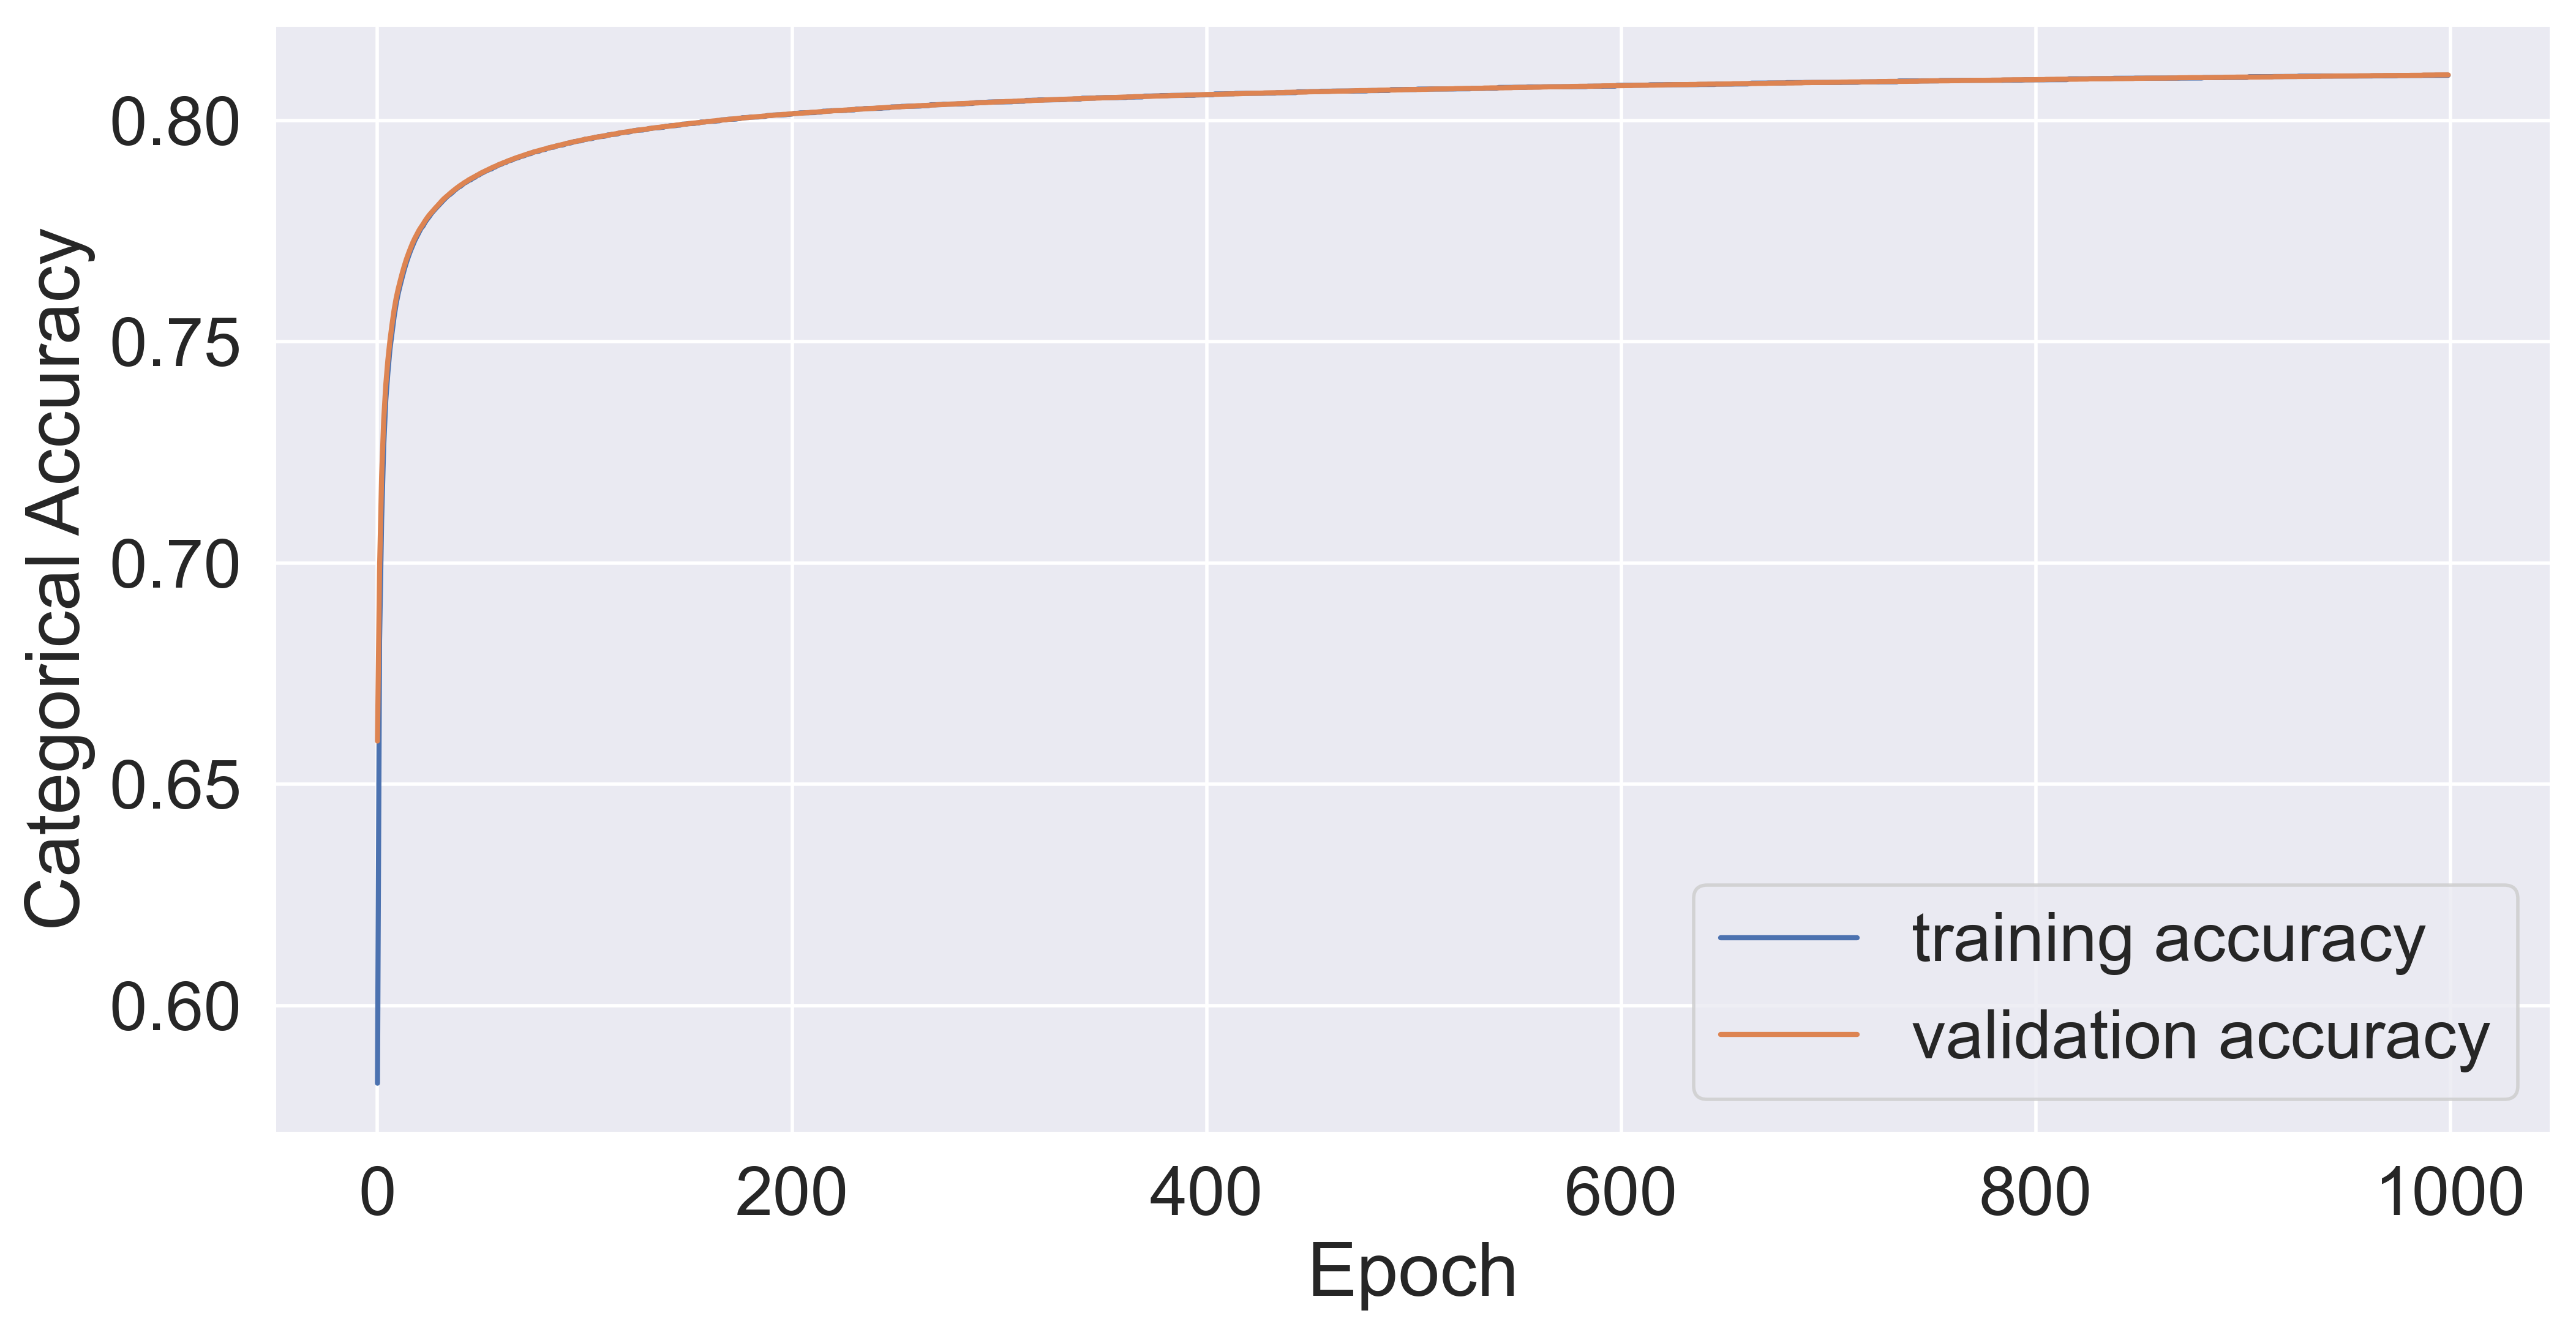

In [10]:
# Plotting the accuracies 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_cyli_big, training_accs_cyli_big, label = "training accuracy")
plt.plot(epochs_cyli_big, validation_accs_cyli_big, label = "validation accuracy")
plt.xlabel("Epoch", Fontsize = best_font_size+2)
plt.ylabel("Categorical Accuracy", Fontsize = best_font_size+2)
plt.legend(loc='lower right', prop={"size":best_font_size})
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(folder_name_cyli_big + "/training_validation_accuracies_plot_" + str(len(epochs_cyli_big)) + "_epochs.png")
plt.show()

In [11]:
print(training_accs_cyli_big[556])
print(validation_accs_cyli_big[556])

0.8075789213180542
0.8075023889541626


In [12]:
print("Highest validation accuracy achieved for Cylinder vs Big Cube: ", max(validation_accs_cyli_big))

Highest validation accuracy achieved for Cylinder vs Big Cube:  0.810302734375


### Small Cube vs Big Cube 

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


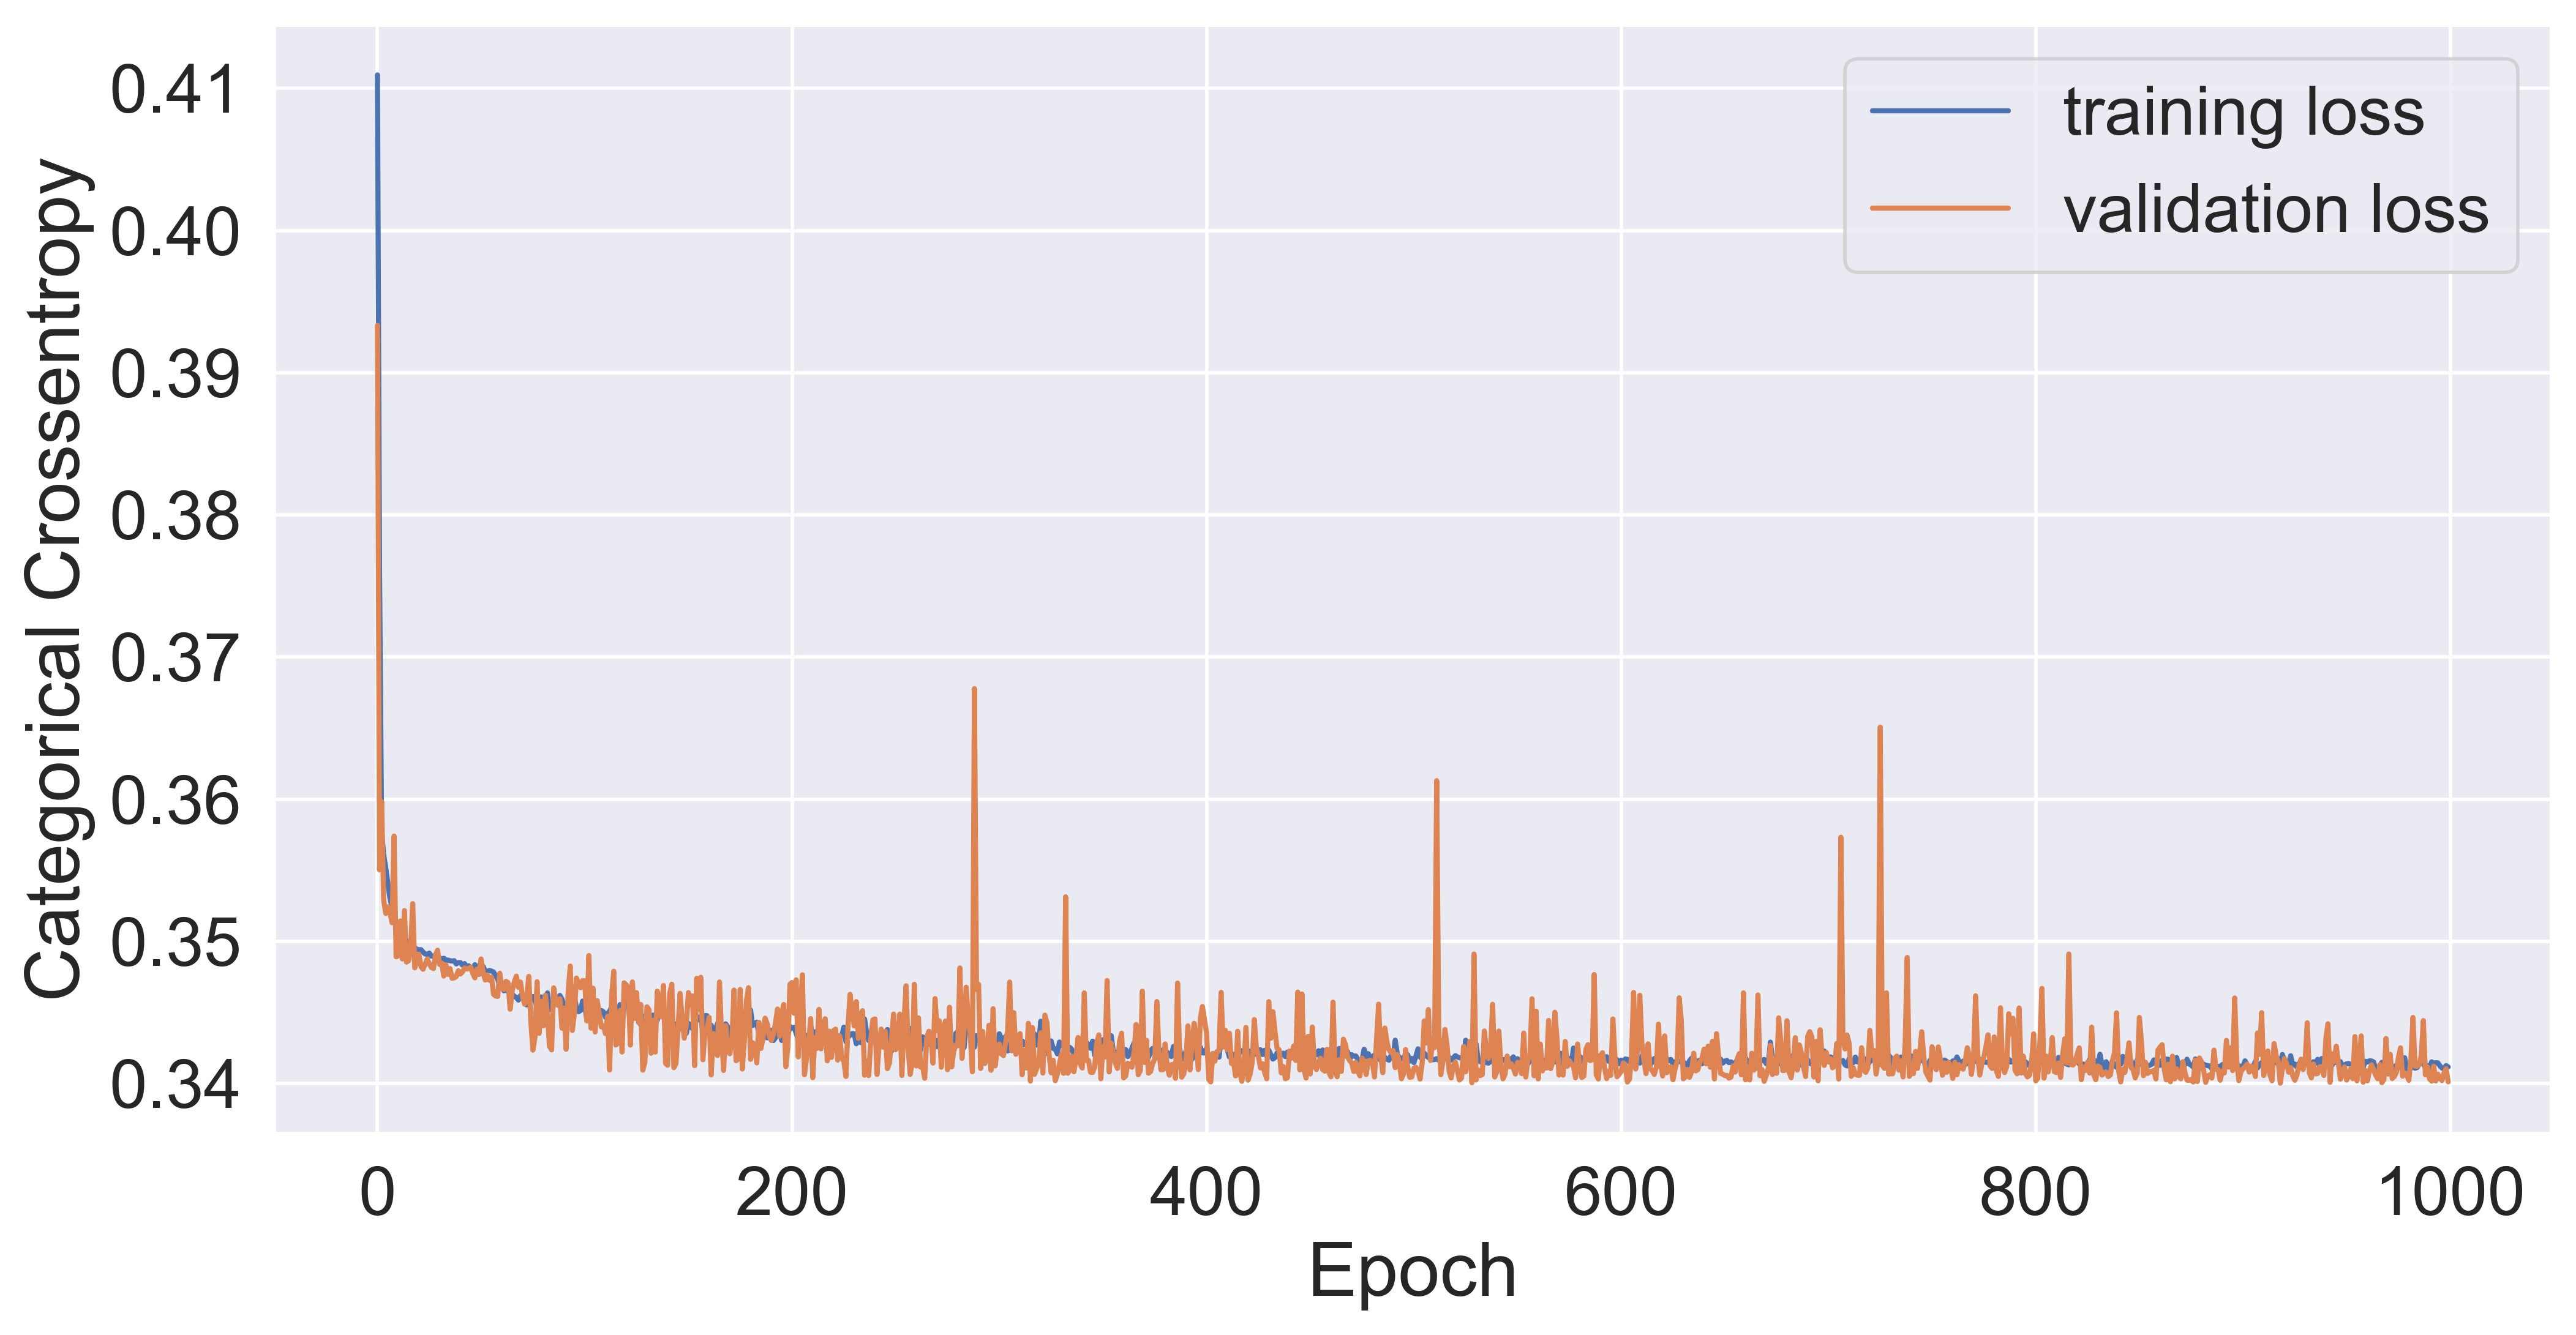

In [11]:
# Making the plots 

# Plotting the losses 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_small_big, training_losses_small_big, label = "training loss")
plt.plot(epochs_small_big, validation_losses_small_big, label = "validation loss")
plt.xlabel("Epoch" , Fontsize = best_font_size+2)
plt.ylabel("Categorical Crossentropy" , Fontsize = best_font_size+2)
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(loc='upper right', prop={"size":best_font_size})
plt.savefig(folder_name_small_big + "/training_validation_losses_plot_" + str(len(epochs_small_big)) + "_epochs.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


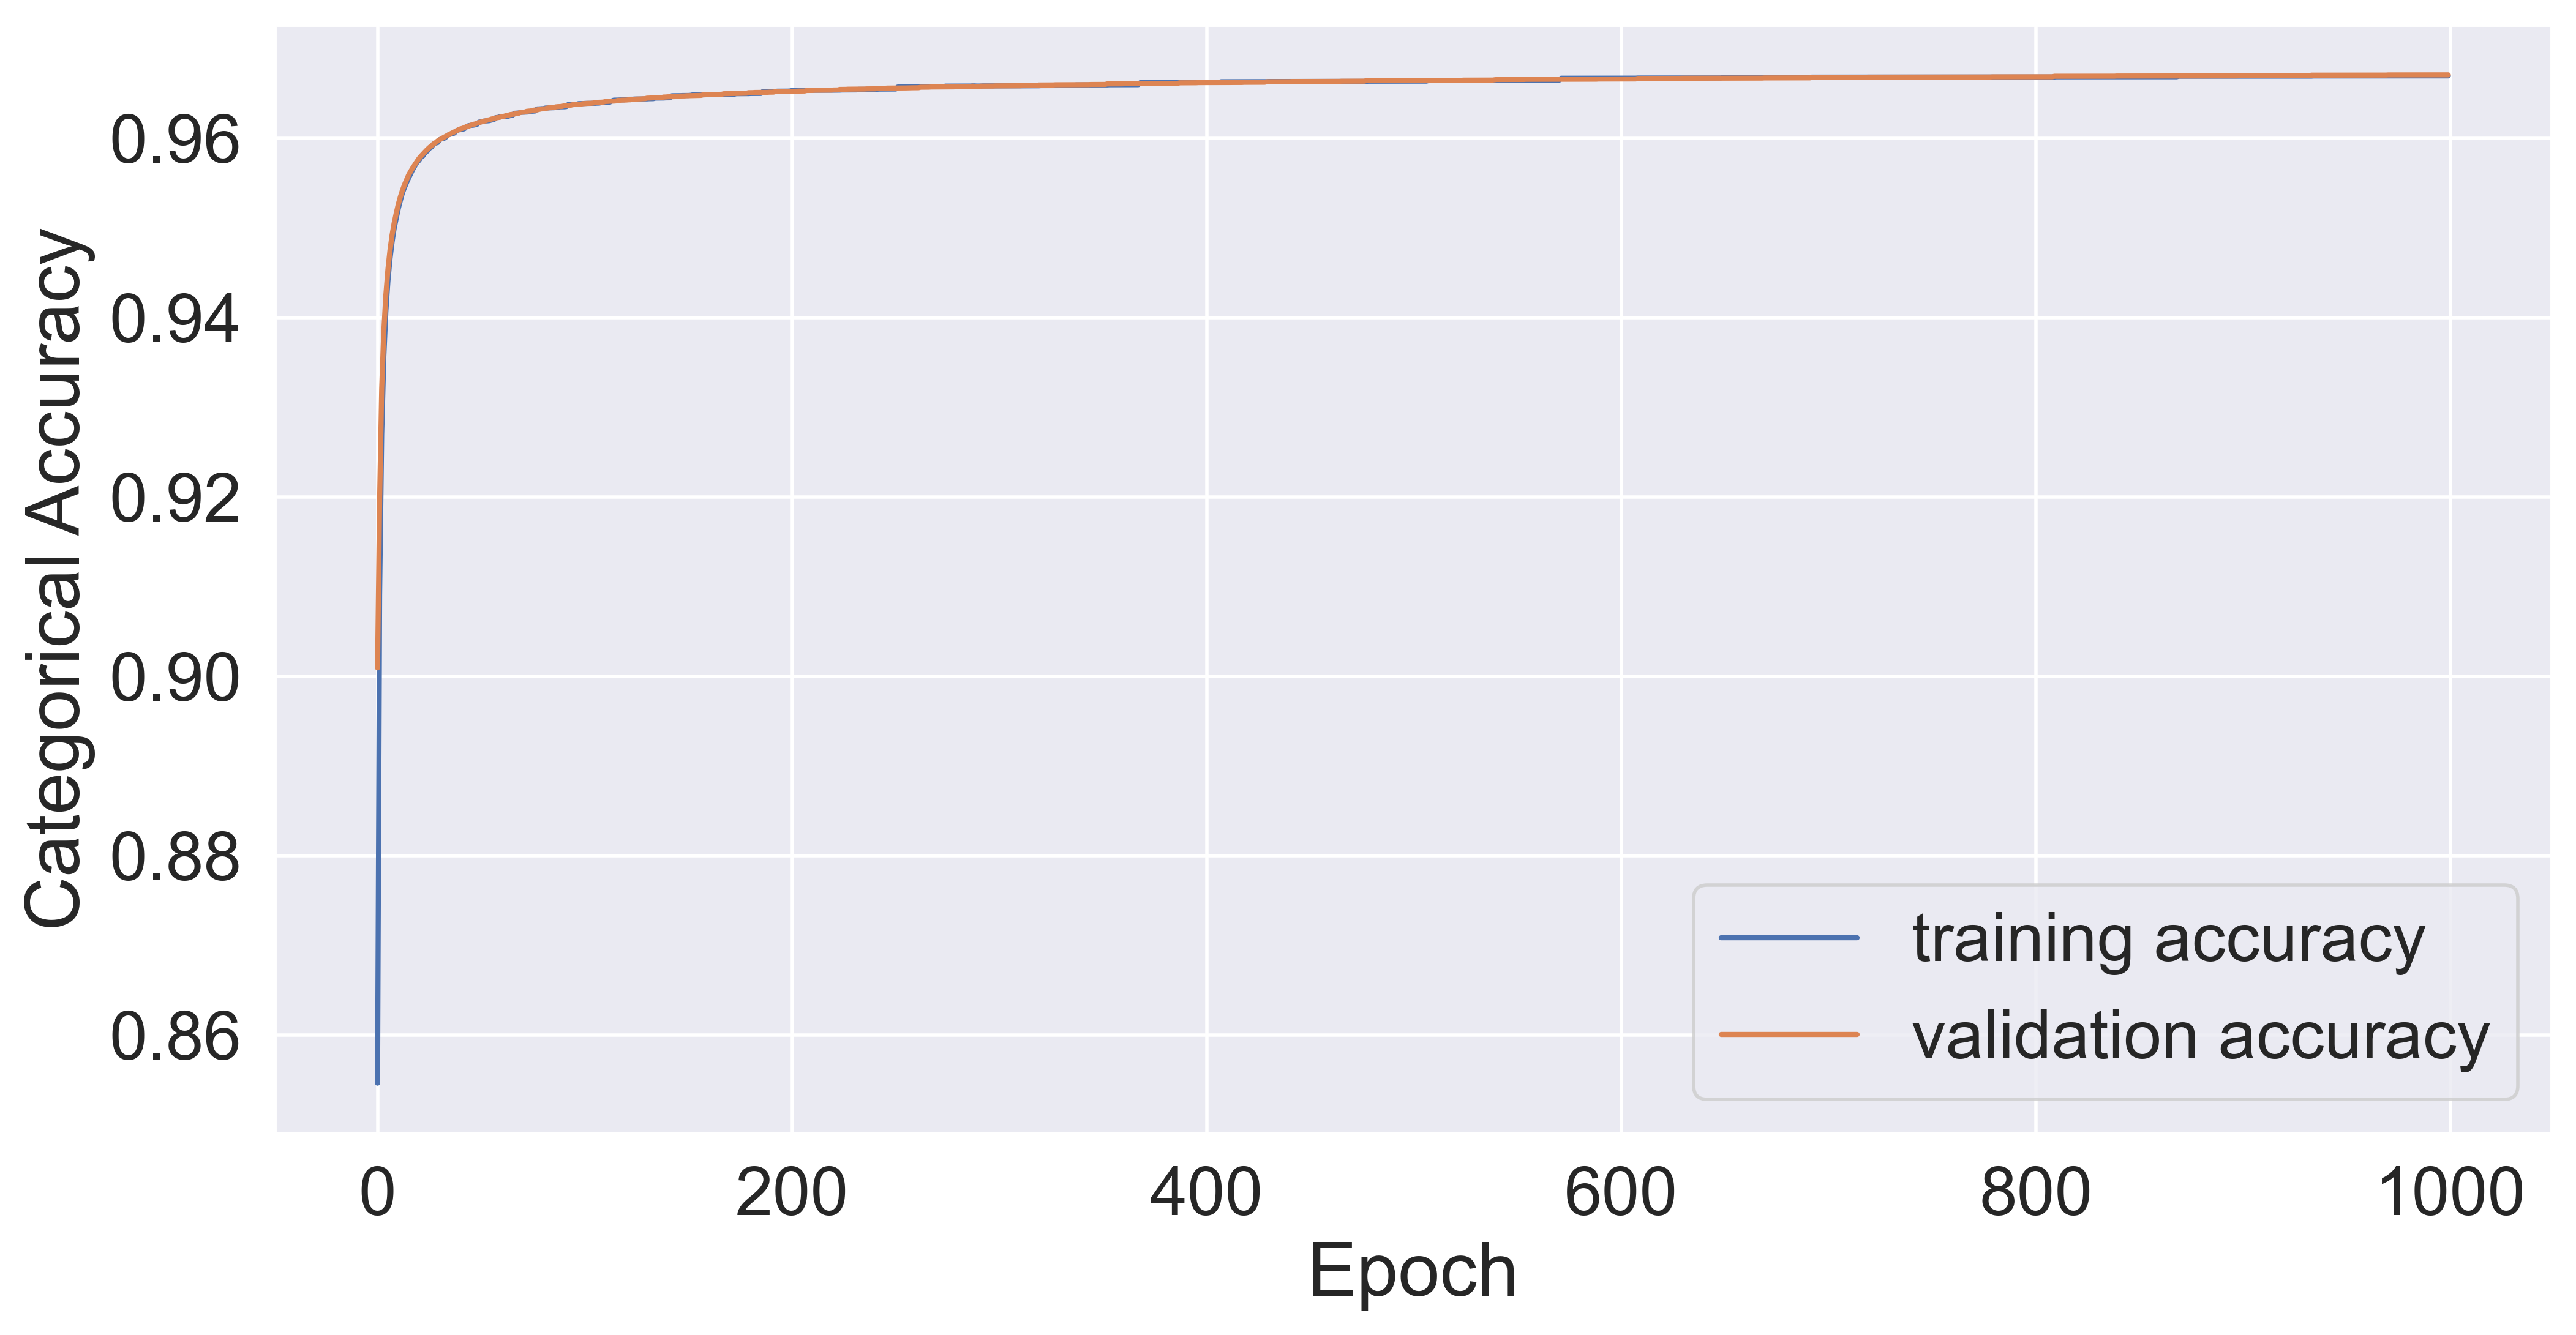

In [14]:
# Plotting the accuracies 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_small_big, training_accs_small_big, label = "training accuracy")
plt.plot(epochs_small_big, validation_accs_small_big, label = "validation accuracy")
plt.xlabel("Epoch" , Fontsize = best_font_size+2)
plt.ylabel("Categorical Accuracy" , Fontsize = best_font_size+2)
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(loc='lower right', prop={"size":best_font_size})
plt.savefig(folder_name_small_big + "/training_validation_accuracies_plot_" + str(len(epochs_small_big)) + "_epochs.png")
plt.show()

In [15]:
print("Highest validation accuracy achieved for Small Cube vs Big Cube: ", max(validation_accs_small_big))

Highest validation accuracy achieved for Small Cube vs Big Cube:  0.9670408964157104


### Medium Cube vs Big Cube 

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


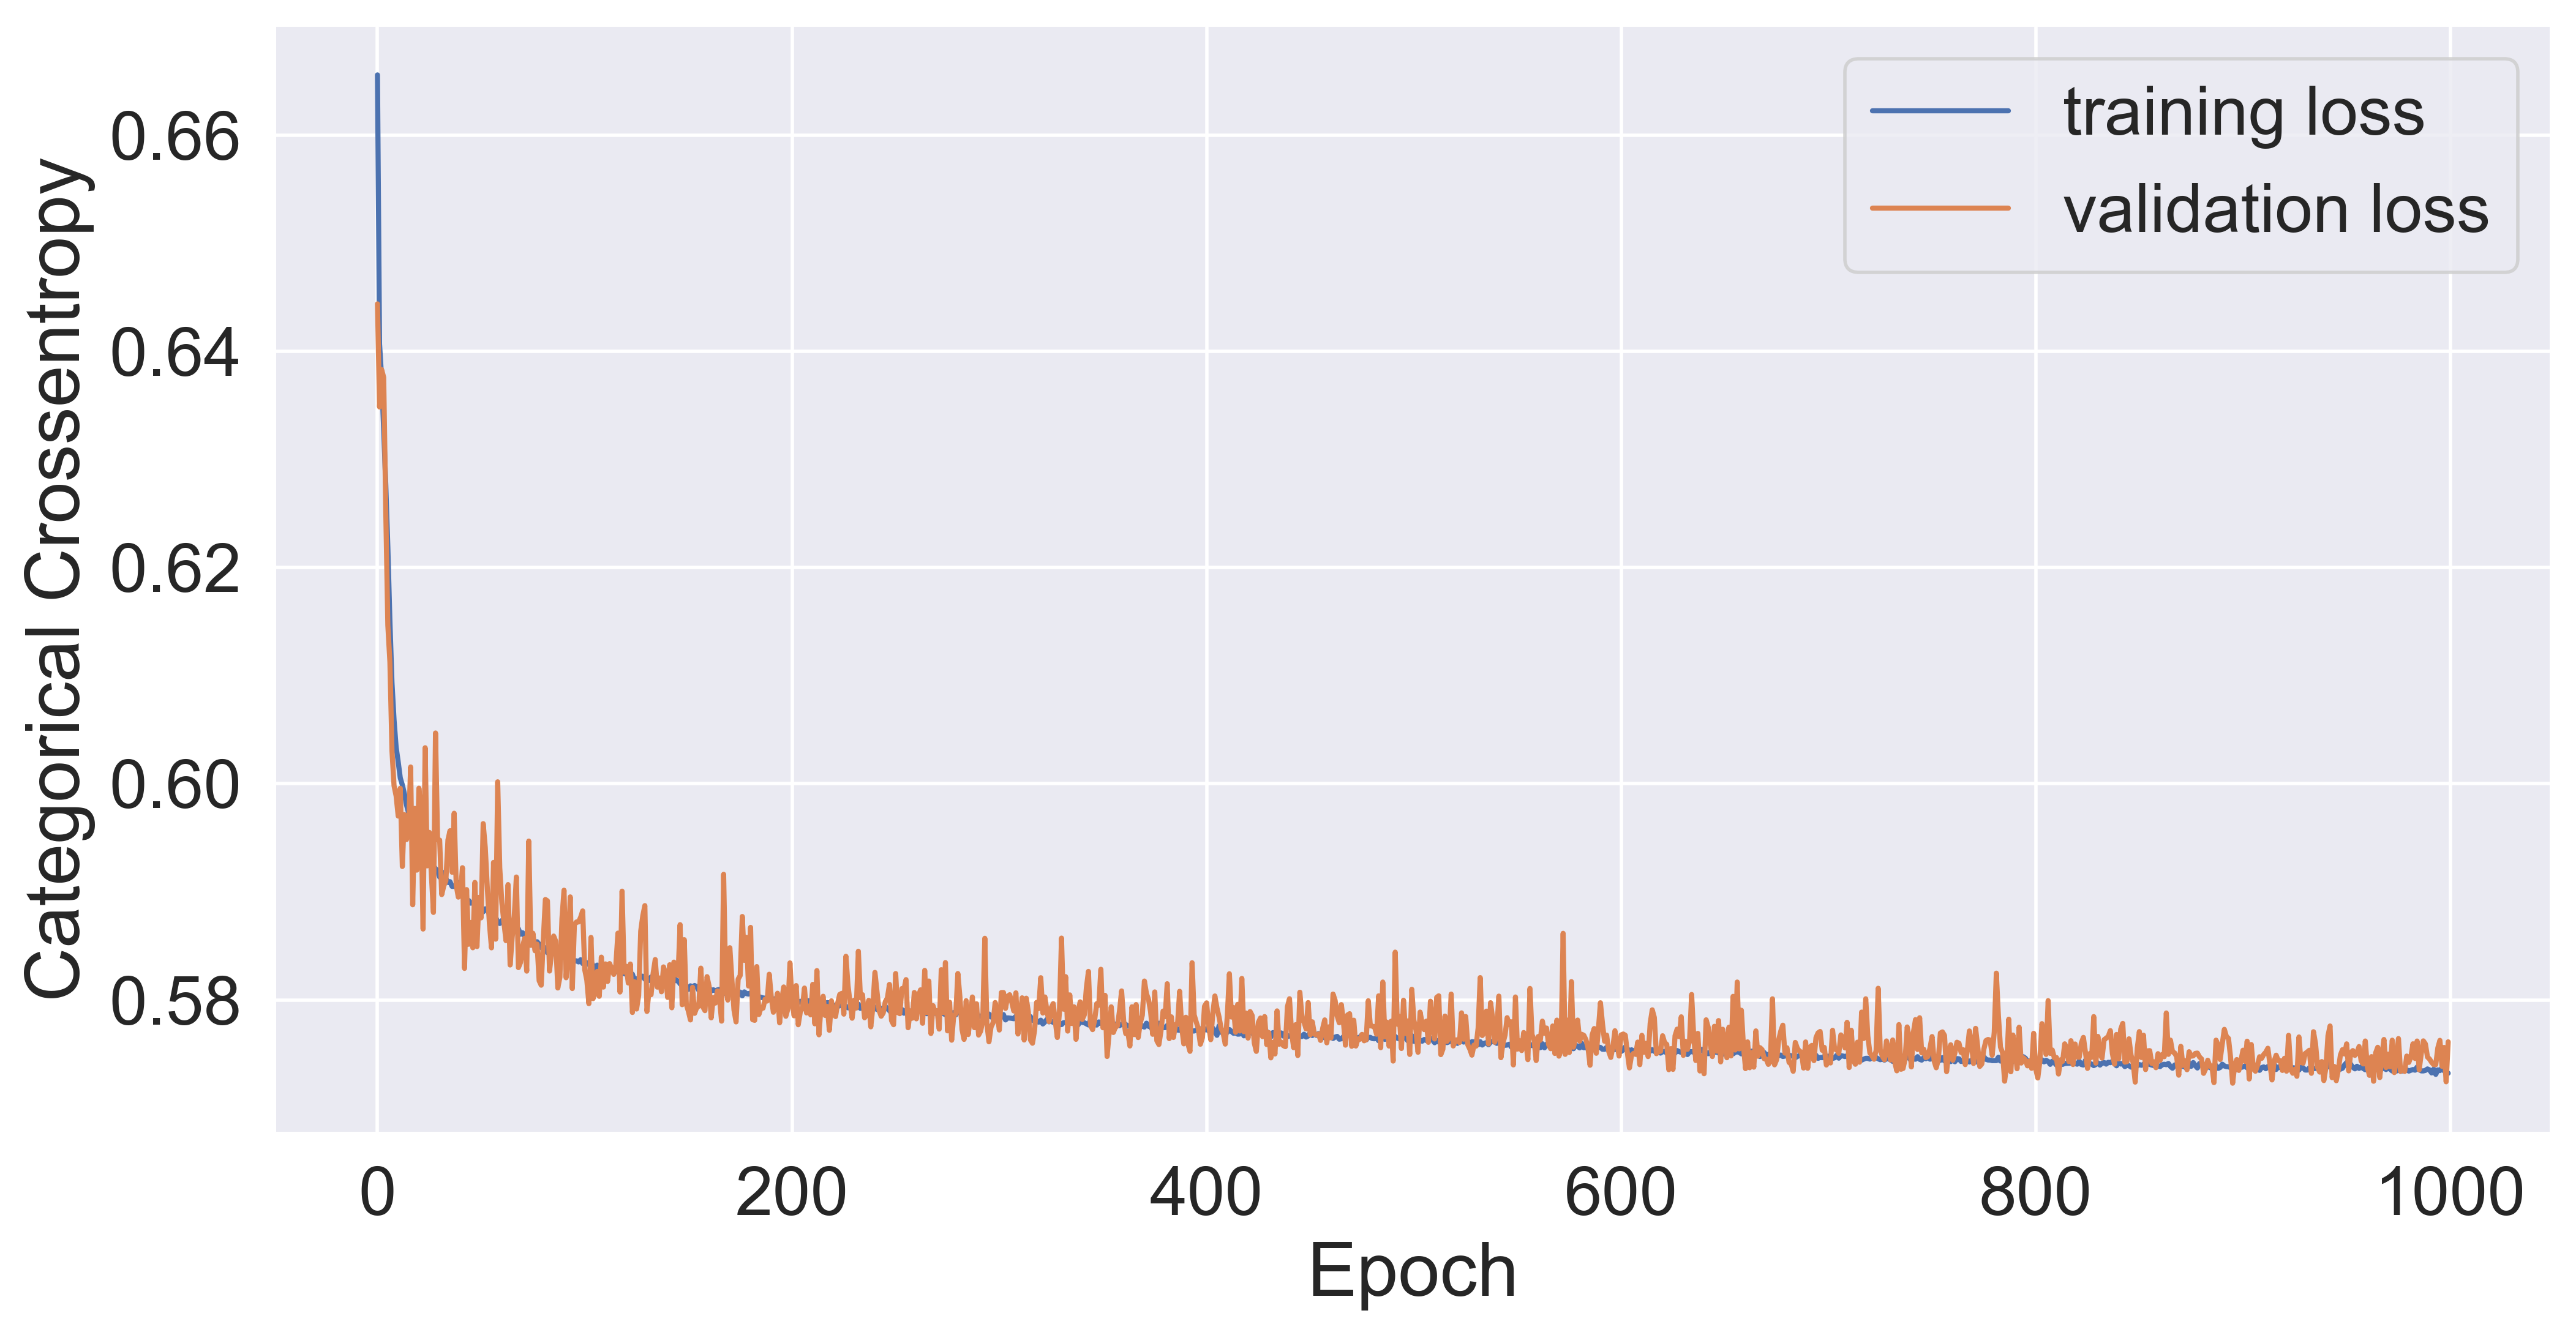

In [13]:
# Making the plots 

# Plotting the losses 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_medium_big, training_losses_medium_big, label = "training loss")
plt.plot(epochs_medium_big, validation_losses_medium_big, label = "validation loss")
plt.xlabel("Epoch", Fontsize = best_font_size+2)
plt.ylabel("Categorical Crossentropy" , Fontsize = best_font_size+2)
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(loc='upper right', prop={"size":best_font_size})
plt.savefig(folder_name_medium_big + "/training_validation_losses_plot_" + str(len(epochs_medium_big)) + "_epochs.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


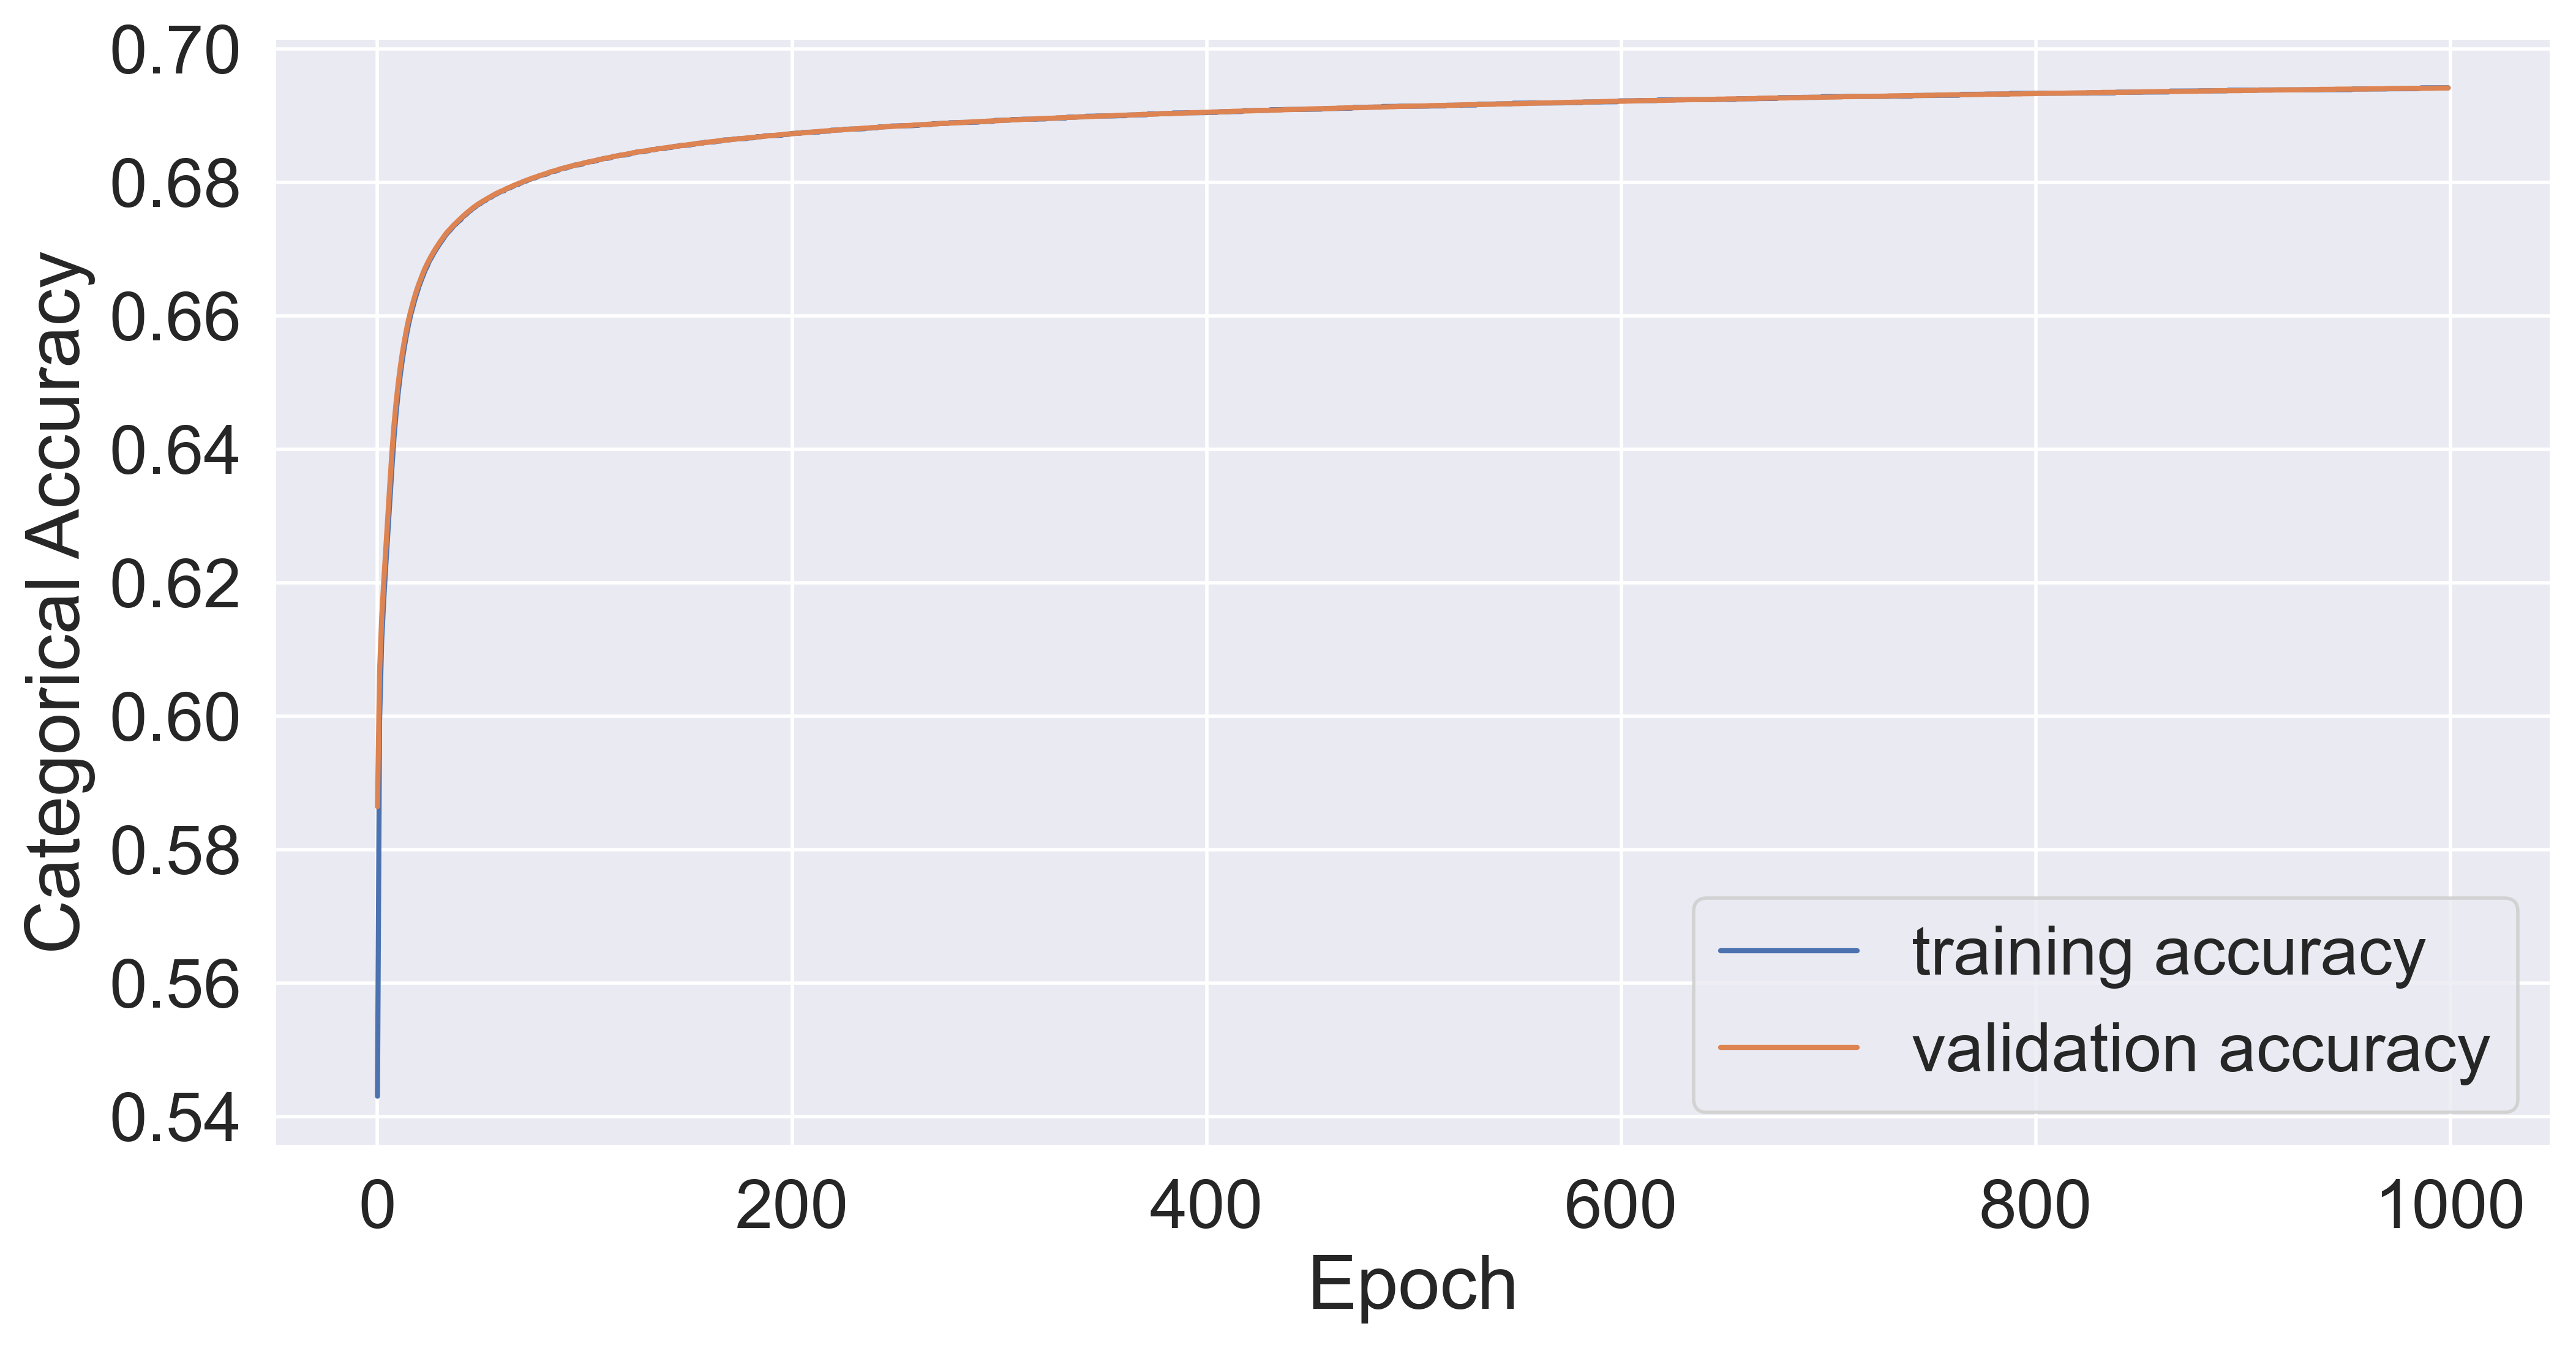

In [12]:
# Plotting the accuracies 
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(epochs_medium_big, training_accs_medium_big, label = "training accuracy")
plt.plot(epochs_medium_big, validation_accs_medium_big, label = "validation accuracy")
plt.xlabel("Epoch", Fontsize = best_font_size+2)
plt.ylabel("Categorical Accuracy " , Fontsize = best_font_size+2)
plt.legend(loc='lower right', prop={"size":best_font_size})
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(folder_name_medium_big + "/training_validation_accuracies_plot_" + str(len(epochs_medium_big)) + "_epochs.png")
plt.show()

In [18]:
print("Highest validation accuracy achieved for Medium Cube vs Big Cube: ", max(validation_accs_medium_big))

Highest validation accuracy achieved for Medium Cube vs Big Cube:  0.6941345930099487
